In [25]:
!pip install opencv-python==4.6.0.66 

In [26]:
# code source: https://www.digitalocean.com/community/tutorials/filters-in-convolutional-neural-networks

#***************************************************************************#
# if you would like to see the relu activation after applying of the filter
# uncomment the line   convolved = F.relu(convolved)
#***************************************************************************#


import numpy as np
import torch
import torch.nn.functional as F
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt


def convolve(image_filepath, filter, title=''):
    """
    This function performs convolution and
    returns both the original and convolved
    images.
    """

    #  reading image in grayscale format
    image = cv2.imread(image_filepath, cv2.IMREAD_GRAYSCALE)

    #  defining filter size
    filter_size = filter.shape[0]

    #  creating an array to store convolutions (x-m+1, y-n+1)
    convolved = np.zeros(((image.shape[0] - filter_size) + 1, 
                      (image.shape[1] - filter_size) + 1))
    
    #  performing convolution
    for i in tqdm(range(image.shape[0])):
      for j in range(image.shape[1]):
        try:
          convolved[i,j] = (image[i:(i+filter_size),
                                  j:(j+filter_size)] * filter).sum()
        except Exception:
          pass

    #  converting to tensor
    convolved = torch.tensor(convolved)
    #  applying relu activation
    #convolved = F.relu(convolved)

    #  producing plots
    figure, axes = plt.subplots(1,2, dpi=120)
    plt.suptitle(title)
    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('original')
    axes[1].imshow(convolved, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('convolved')
    pass

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 561.53it/s]


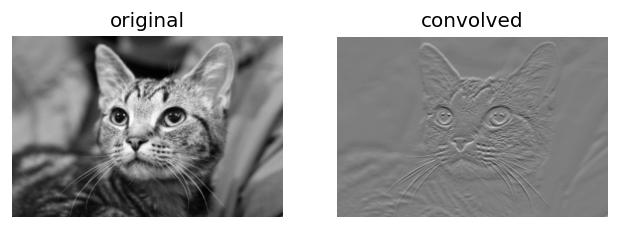

In [27]:

horizontal = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])
# utilizing the horizontal filter
convolve('image.png', horizontal)

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 579.12it/s]


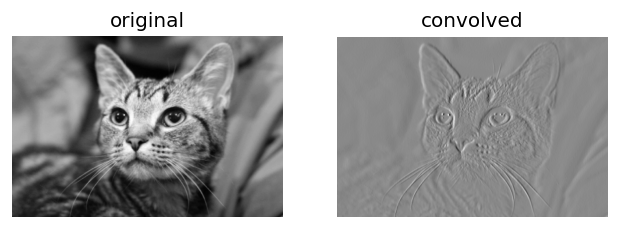

In [28]:
vertical = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
convolve('image.png', vertical)

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 568.27it/s]


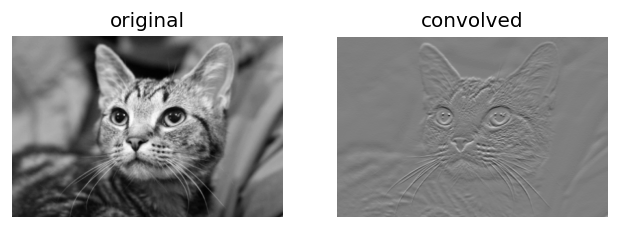

In [29]:
horizontal_sobel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])
convolve('image.png', horizontal_sobel)

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 573.84it/s]


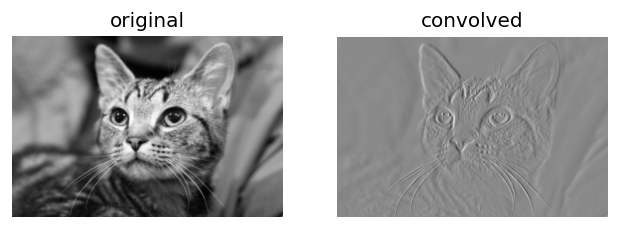

In [30]:
vertical_sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
convolve('image.png', vertical_sobel)

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 578.76it/s]


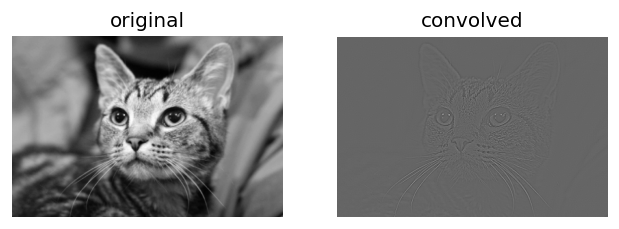

In [31]:
laplacian_filter = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])
convolve('image.png', laplacian_filter)

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 503.21it/s]


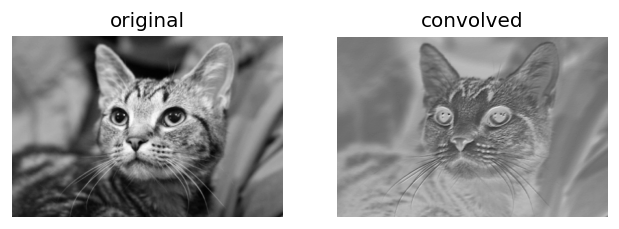

In [32]:
north_west_robinson = np.array([
    [1,  1,  1],
    [1, -2, -1],
    [-1, -1, -1]
])
convolve('image.png', north_west_robinson)

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 507.89it/s]


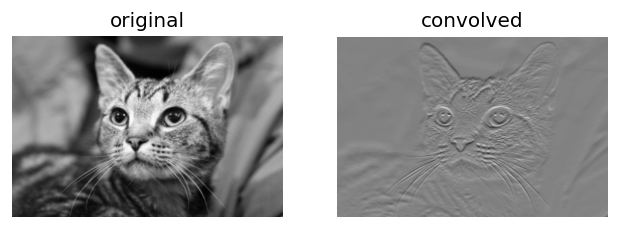

In [33]:
north_robinson = np.array([
    [1,  1,  1],
    [0,  0,  0],
    [-1, -1, -1]
])
convolve('image.png', north_robinson)

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 525.70it/s]


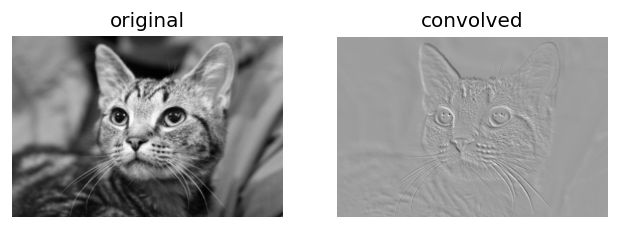

In [34]:
north_east_robinson = np.array([
    [1,  1,  1],
    [-1, -2,  1],
    [-1, -1,  1]
])
convolve('image.png', north_east_robinson)

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 501.68it/s]


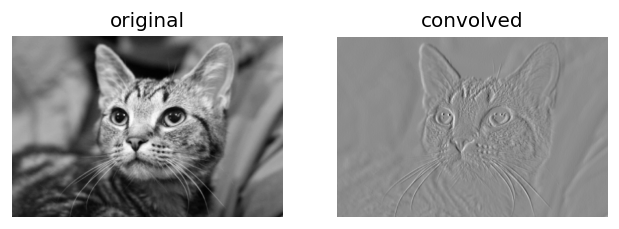

In [35]:
east_robinson = np.array([
    [-1,  1,  1],
    [-1, -2,  1],
    [-1,  1,  1]
])
convolve('image.png', east_robinson)

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 514.49it/s]


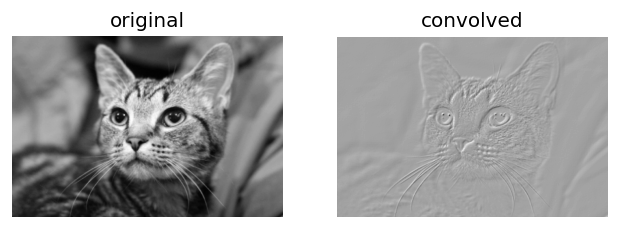

In [36]:
south_east_robinson = np.array([
    [-1, -1,  1],
    [-1, -2,  1],
    [ 1,  1,  1]
])
convolve('image.png', south_east_robinson)

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 520.87it/s]


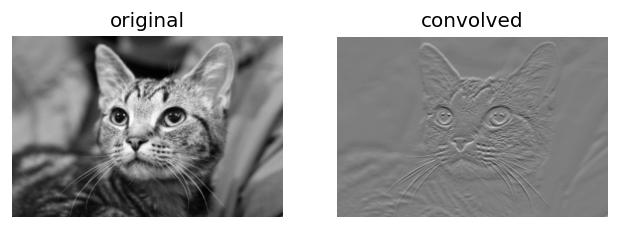

In [37]:
south_robinson = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])
convolve('image.png', south_robinson)

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 519.05it/s]


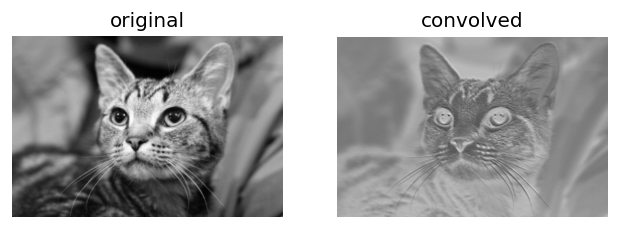

In [38]:
south_west_robinson = np.array([
    [-1, -1, -1],
    [ 1, -2, -1],
    [ 1,  1,  1]
])
convolve('image.png', south_west_robinson)

100%|████████████████████████████████████████| 391/391 [00:00<00:00, 498.97it/s]


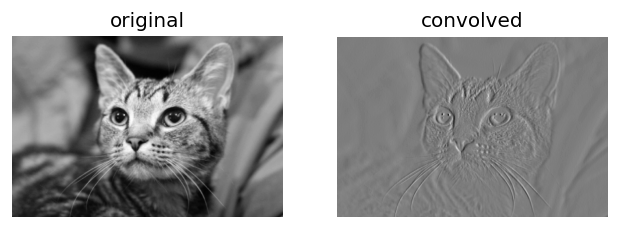

In [39]:
west_robinson = np.array([
    [ 1,  1, -1],
    [ 1, -2, -1],
    [ 1,  1, -1]
])
convolve('image.png', west_robinson)